In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from google.colab import drive
drive.mount('/content/drive')

     |████████████████████████████████| 727kB 5.3MB/s 
     |████████████████████████████████| 194kB 8.4MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 1.2MB 11.3MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
Mounted at /content/gdrive
Mounted at /content/drive


##Image Classifier

Dataset <a href="https://www.robots.ox.ac.uk/~vgg/data/pets/" target="_blank">link</a>

In [ ]:
#Despite the *, the import statement is only getting the bits you actually need
from fastai.vision.all import *
#Download the dataset, decompress and store it in the PC. Returns the path where the dataset is decompressed to
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
#valid_pct (valid_percent) grabs 20% of the data for determining the error rate of the model (test data)
#This is to make sure that we are not overfitting
#Overfitting is when you train the model for too long on not enough data. That's when the accuracy of the model starts to worsen
dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct=0.2, seed=42, label_func=is_cat, item_tfms=Resize(224))
#The learner function takes in the data, the architecture (resnet34, for computer vision) and the metric to use
learn = cnn_learner(dls, resnet34, metrics=error_rate)
#fine_tune actually does the training
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.163125,0.034111,0.008796,01:35


epoch,train_loss,valid_loss,error_rate,time
0,0.055576,0.025192,0.010149,02:12


##What's Happening?

The code is grabbing the 'Pets' dataset of images and tries to figure out which ones are cats and which ones are dogs. Error rate is the proportion of images that were identified incorrectly. The error rate is a metric and serves as the measure of the model's quality. 

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

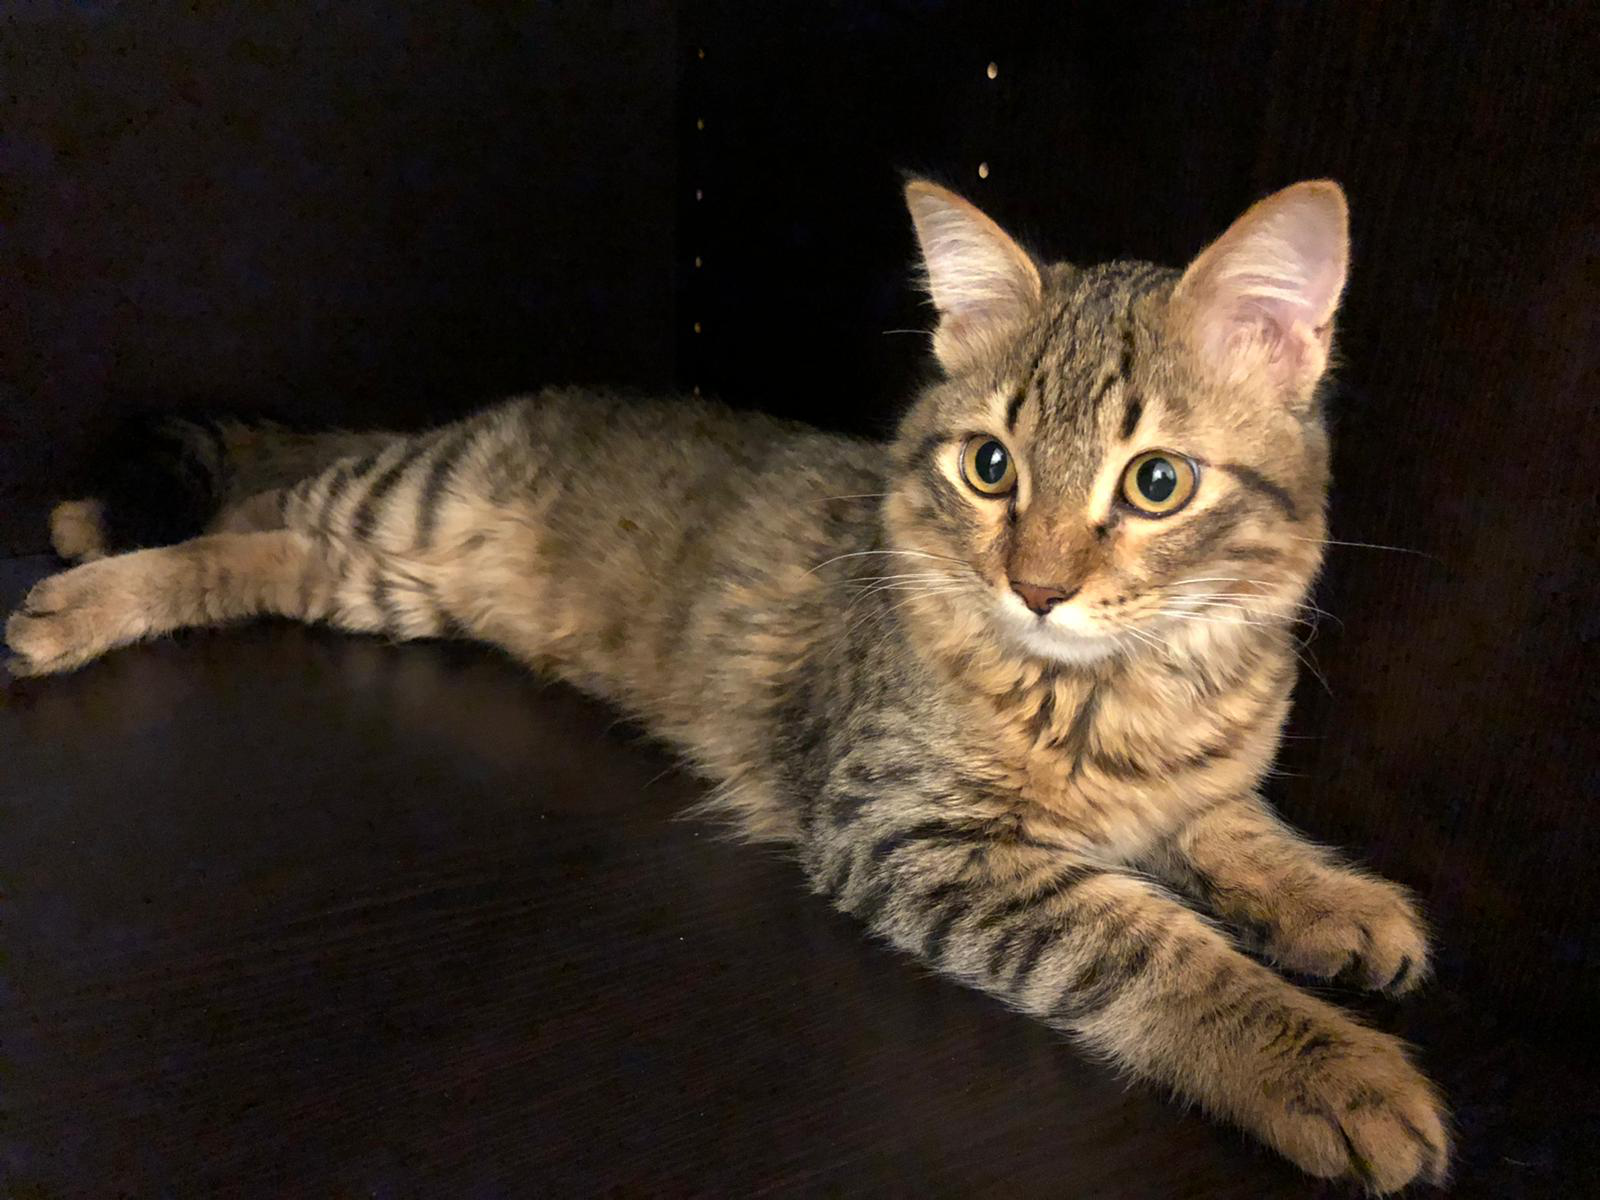

In [ ]:
img = PILImage.create(uploader.data[0])
img

In [ ]:
is_cat, _,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


##What is Machine Learning?

Deep Learning is a modern area in the more general discipline of machine learning. This pet classifier is a type of Deep Learning model. Deep Learning models use neural networks. Machine Learning is a way to get computers to complete a specific task. 

<i>Machine Learning</i><br/>
The training of programs developed by allowing a computer to learn from its experience, rather than through manually coding the individual steps.
<br/>
<i>Neural Network</i><br/>
A function that is so flexible that it could be used to solve any given problem, just by varying the 'weights'. A mathematical proof called the 'Universal Approximation Theorem' shows that this function can solve any problem to any level of accuracy, in theory.<br/>

##Limitations Inherent to Machine Learning
<ol>
<li>A model cannot be created without data</li>
<li>A model can only learn to operate on the patterns seen in the input data used to train it</li>
<li>This learning approach only creates <i>predictions</i>, not recommended <i>actions</i></li>
<li>It's not enough to have examples of input data; we need labels for that data too.</li><br/>

<p>The craft of Deep Learning is to create a model that has a proper fit. The only way to see if it has a proper fit is to see if it works well on data that the model has not been trained on. Some of the data is always set aside to create a model validation set.</p>

#Questionnaire

<b>1-Do you need these for Deep Learning?</b><br/>
<ul>
<li>Lots of math (FALSE)</LI>
<li>Lots of data (FALSE)</li>
<li>Lots of expensive computers (FALSE)</li>
<li>A PhD (FALSE)</li>
</ul>

<b>2-Name FIVE areas where Deep Learning is now best in the world?</b>
<ol>
<li>Natural Language Processing (NLP)</li>
<li>Computer Vision</li>
<li>Medicine</li>
<li>Image Generation</li>
<li>Recommendation Systems</li>
</ol>

<b>3-What was the name of the first device that was based on the principle of the artificial neuron?</b><br/>
<p>Mark 1 Perceptron</p><br/>

<b>4-Based on a book of the same name, what are the requirements for parallel distributed processing?</b><br/>
<p>The requirements for Parallel Distributed Processing (PDP) include:
<ol>
<li>A set of processing units</li>
<li>A state of activation</li>
<li>An output function for each unit</li>
<li>A pattern of connectivity among units</li>
<li>A propagation rule for propagating patterns of activities through the network of connectivities</li>
<li>An activation rule for combining the inputs impinging on a unit with the current state of that unit to produce an output for the unit</li>
<li>A learning rule whereby patterns of connectivity are modified by experience</li>
<li>An environment within which the system must operate</li></p><br/>

<b>5-What were the two theoretical misunderstandings that held back the field of neural networks?</b>
<p>The first theoretical misunderstanding was that Marvin Minsky stated in his book that a single layer of neurons was unable to perform some simple mathematical functions such as XOR. The second misunderstanding was though theoretically adding just one extra layer of neuron was enough to approximate any mathematical operation, in practice such networks were often too big and too slow to be useful.</p><br/>

<b>6-What is a GPU?</b><br/>
<p>A GPU is a Graphics Processing Unit. GPUs were designed for parallel processing and have a wide range of applications, most famously, in gaming. However, GPUs are now gaining prominence in Artificial Intelligence (AI).</p><br/>

<b>7-Why is it hard to use a traditional computer program to recognize images in a photo?</b><br/>
<p>The reason it would be difficult for a traditional computer program to recognize images in a photo is we would have to write down the exact steps necessary to complete the task. But we don't know what the steps as the recognition happens in our brain without us being consciously aware of it.</p><br/>

<b>8-What did Samuel mean by 'Weight Assignment'?</b><br/>
<p>Weights are just variables. A weight assignment is a particular choice of value for the variable. The input to the DL program is a set of values that it processes to produce an output. The weight assignments are other values that influence the output.</p><br/>

<b>9-What term do we normally use in Deep Learning for what Samuel called 'Weights'?</b><br/>
<p>Weights are now referred to as model parameters.</p><br/>

<b>10-Why is it hard to understand why a Deep Learning model makes a particular prediction?</b><br/>
<p>It's difficult to understand why a Deep Learning model makes a particular prediction because the model </p><br/>

<b>11-What is the name of the theorem that shows that a neural network can solve any mathematical problem to any level of accuracy?</b><br/>
<p>The mathematical theorem is called the 'Universal Approximation Theorem'.</p><br/>

<b>12-What do you need in order to train a model?</b><br/>
<ul>
<li>A model cannot be created without data</li>
<li>A model only learns from the patterns it sees in the data that is fed to it</li>
<li>It is not enough to just have data to feed into the model. The data should have labels too.</li></ul><br/>

<b>13-How could a feedback loop impact the rollout of a predictive policing model?</b><br/>
<p>A predictive policing model is built using datasets of arrests made in the past. The dataset reflects only arrests made and does not actually predict crime. Therefore, the model reflects biases in existing police procedures. The law enforcement officers will rely on the model to tell them where to concentrate their efforts which results in more arrests in those areas. Data from these arrests is then fed back into the model for retraining. This is a positive feedback loop where biased data makes the model even more biased.</p><br/>

<b>14-What is the difference between classification and regression?</b><br/>
<p><b>Regression</b> in machine learning allows us to predict a continuous variable based on one or more predictor variables. <b>Classification</b> in machine learning predicts a label (discrete) for a given input data. Both are examples of supervised machine learning.</p><br/>

<b>15-What is a validation set? What is a test set? Why do we need them?</b><br/>
<p>A validation set is used to improve the model. In fastai, this is 20% of the data that is not used to train the model. A test set is used to evaluate the accuracy of the model at the very end prior to deployment.</p><br/>

<b>16-D we always have to use 224x224 pixel images with the cat recognition model?</b><br/>
<p>Historically, the size of the images fed into models was 224x224 pixels. But that is not a requirement. We can pass an image of any size into the model.</p><br/>

<b>17-What will fastai do if you don't provide a validation set?</b><br/>
<p>If fastai is not explicitly provided with a validation set, it'll set aside 20% of the training data for validation purposes.</p><br/>

<b>18-What is overfitting?</b><br/>
<p>Overfitting happens when the model has been trained too long on an input dataset. The accuracy improves for a while but after a long enough time, it'll memorize the label of every item in the dataset, instead of finding general patterns.</p><br/>

<b>19-What is a metric? How does it differ from a loss?</b><br/>
<p>A metric is defined to assess how well the model performs on the validation set. The loss function determines if a prediction by the model is good or bad.</p><br/>

<b>20-What is an architecture?</b><br/>
<p>An 'architecture' is what was previously known as a model.</p><br/>

<b>21-What is segmentation?</b><br/>
<p>Segmentation is when a model is created to recognize the contents of every single pixel in an image.</p><br/>

<b>22-What are 'Hyperparameters'?</b><br/>
<p>A model is rarely only trained using its weight parameters. In reality, it goes through many different iterations of different modeling choices in architecture, learning rates, among others. These choices can be described as hyperparameters, that is, parameters about parameters.</p><br/>